In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

train_df.groupby(["FamilySize"], as_index=False)["Survived"].agg(['mean', 'count'])

,FamilySize,mean,count
0,1,0.303538,537
1,2,0.552795,161
2,3,0.578431,102
3,4,0.724138,29
4,5,0.200000,15
5,6,0.136364,22
6,7,0.333333,12
7,8,0.000000,6
8,11,0.000000,7


In [4]:
train_df['Fam_type'] = pd.cut(train_df['FamilySize'], bins=[0,1,4,7,11], labels=['Solo', 'Small', 'Medium', 'Big'])
test_df['Fam_type'] = pd.cut(test_df['FamilySize'], bins=[0,1,4,7,11], labels=['Solo', 'Small', 'Medium', 'Big'])
train_df.groupby(['Fam_type'], as_index=False)['Survived'].agg(['mean', 'count'])


C:\Users\Adiraj\AppData\Local\Temp\ipykernel_2832\3645824774.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fam_type'], as_index=False)['Survived'].agg(['mean', 'count'])


,Fam_type,mean,count
0,Solo,0.303538,537
1,Small,0.578767,292
2,Medium,0.204082,49
3,Big,0.000000,13


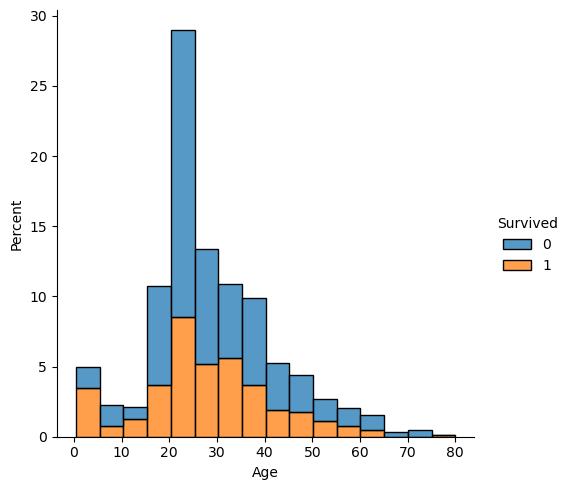

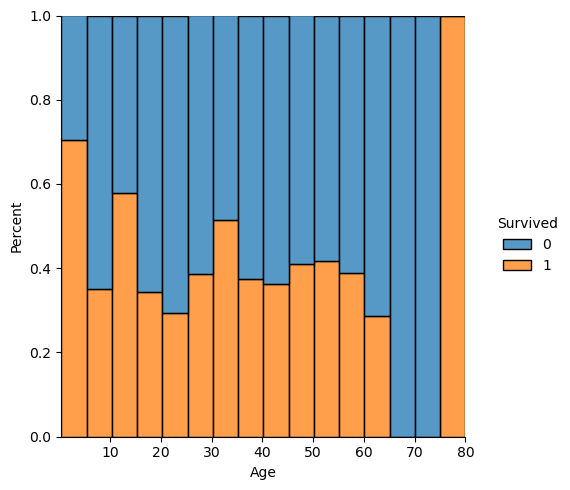

In [5]:
train_df ['Age']= train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df ['Age']= test_df .groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

sns.displot(train_df, x='Age', hue='Survived', binwidth=5, height=5, multiple='stack', stat='percent')
sns.displot(train_df, x='Age', hue='Survived' , binwidth=5, height=5, multiple='fill', stat='percent')

In [6]:
def encodeAge(train):
    train.loc[train_df['Age'] <= 16, 'Age'] = 0
    train.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
    train.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
    train.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
    train.loc[(train_df['Age'] > 64) & (train_df['Age'] <= 80), 'Age'] = 4

encodeAge(train_df)

def encodeAge(test):
    test.loc[test_df['Age'] <= 16, 'Age'] = 0
    test.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
    test.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
    test.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
    test.loc[(test_df['Age'] > 64) & (test_df['Age'] <= 80), 'Age'] = 4 

encodeAge(test_df)

In [7]:
train_df.groupby(['Age'], as_index=False)['Survived'].mean()

,Age,Survived
0,0.0,0.550000
1,1.0,0.336714
2,2.0,0.412844
3,3.0,0.434783
4,4.0,0.090909


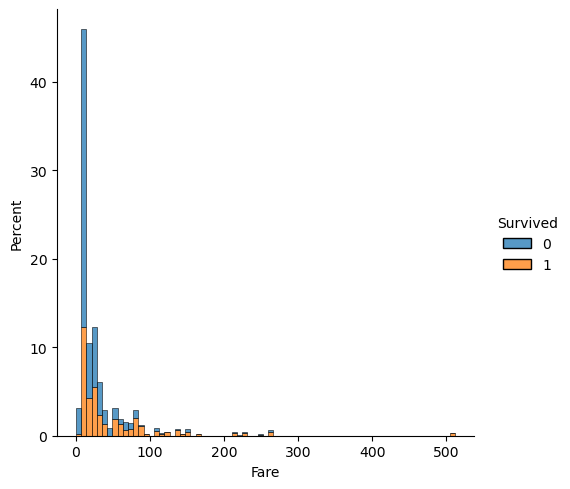

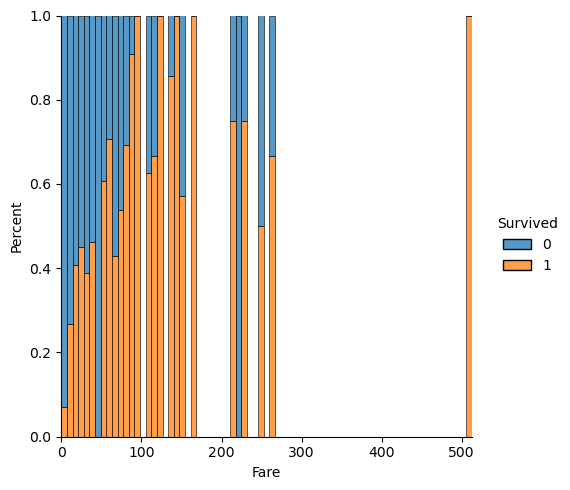

In [8]:
sns.displot(train_df, x='Fare', hue='Survived', binwidth=7, height=5, multiple='stack', stat='percent')
sns.displot(train_df, x='Fare', hue='Survived', binwidth=7, height=5, multiple='fill', stat='percent')

In [9]:
def encodeFare(train):
    train.loc[train_df['Fare'] <= 7.91, 'Fare'] = 0
    train.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
    train.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare'] = 2
    train.loc[train_df['Fare'] > 31, 'Fare'] = 3

encodeFare(train_df)

def encodeFare(test):
    test.loc[test_df['Fare'] <= 7.91, 'Fare'] = 0
    test.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
    test.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare'] = 2
    test.loc[(test_df['Fare'] > 42.0) & (test_df['Fare'] <= 512.3), 'Fare'] = 3

encodeFare(test_df)

In [10]:
train_df.groupby(['Fare'], as_index=False)['Survived'].agg(['mean', 'count'])

,Fare,mean,count
0,0.0,0.197309,223
1,1.0,0.308756,217
2,2.0,0.445415,229
3,3.0,0.581081,222


In [11]:
train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply


In [12]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [13]:
train_df['Title'] = train_df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()
test_df['Title']  = test_df['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0].str.strip()

In [14]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['mean', 'count'])

,Title,mean,count
0,Capt,0.000000,1
1,Col,0.500000,2
2,Don,0.000000,1
3,Dr,0.428571,7
4,Jonkheer,0.000000,1
5,Lady,1.000000,1
6,Major,0.500000,2
7,Master,0.575000,40
8,Miss,0.697802,182
9,Mlle,1.000000,2


In [15]:
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Major', 'Rev', 'Dr', 'Officers'], 'Officers')
train_df['Title'] = train_df['Title'].replace(['Mrs', 'Mme'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Miss', 'Ms', 'Mlle'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Master'], 'Master')
train_df['Title'] = train_df['Title'].replace(['Lady', 'the Countess', 'Sir', 'Jonkheer', 'Don'], 'VIP')
train_df['Title'] = train_df['Title'].replace(['Mr'], 'Mr')

test_df['Title'] = test_df['Title'].replace(['Capt', 'Col', 'Major', 'Rev', 'Dr', 'Officers'], 'Officers')
test_df['Title'] = test_df['Title'].replace(['Mrs', 'Mme'], 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Miss', 'Ms', 'Mlle'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Master'], 'Master')
test_df['Title'] = test_df['Title'].replace(['Lady', 'the Countess', 'Sir', 'Jonkheer', 'Don'], 'VIP')
test_df['Title'] = test_df['Title'].replace(['Mr'], 'Mr')

In [16]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Master,40,0.575000
1,Miss,185,0.702703
2,Mr,517,0.156673
3,Mrs,126,0.793651
4,Officers,18,0.277778
5,VIP,5,0.600000


In [17]:
train_df.Embarked = train_df.Embarked.fillna(train_df.Embarked.mode()[0])
test_df.Embarked = test_df.Embarked.fillna(test_df.Embarked.mode()[0])

In [18]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Fam_type', 'Title'],
      dtype='object')

In [ ]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','FamilySize'], inplace=True, axis=1)
test_df.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','FamilySize'], inplace=True, axis=1)

In [20]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_type,Title
0,0,3,male,1.0,0.0,S,Small,Mr
1,1,1,female,2.0,3.0,C,Small,Mrs
2,1,3,female,1.0,1.0,S,Solo,Miss
3,1,1,female,2.0,3.0,S,Small,Mrs
4,0,3,male,2.0,1.0,S,Solo,Mr


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
train_df["Sex"] = LabelEncoder().fit_transform(train_df["Sex"])
train_df["Embarked"] = LabelEncoder().fit_transform(train_df["Embarked"])
train_df["Fam_type"] = LabelEncoder().fit_transform(train_df["Fam_type"])
train_df["Title"] = LabelEncoder().fit_transform(train_df["Title"])

test_df["Sex"] = LabelEncoder().fit_transform(test_df["Sex"])
test_df["Embarked"] = LabelEncoder().fit_transform(test_df["Embarked"])
test_df["Fam_type"] = LabelEncoder().fit_transform(test_df["Fam_type"])
test_df["Title"] = LabelEncoder().fit_transform(test_df["Title"])

In [23]:
train_df = train_df.loc[:,['Survived', 'Pclass','Sex','Age','Fare','Embarked','Fam_type','Title']]
test_df = test_df.loc[:,['PassengerId','Pclass','Sex','Age','Fare','Embarked','Fam_type','Title']]

KeyError: "['PassengerId'] not in index"

In [24]:
X = train_df.iloc[:,1:].values
y = train_df.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=200)

rf_model = rfc.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)    

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred)) 



              precision    recall  f1-score   support

           0       0.87      0.88      0.87       110
           1       0.81      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [26]:
import pickle

file = open('Titanic_Survival_Prediction.pkl', 'wb')

pickle.dump(rf_model, file)